The advantages of support vector machines are:

1- Effective in high dimensional spaces.

2- Still effective in cases where number of dimensions is greater than the number of samples.

3- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

4-Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

\
**Example 1**

In [2]:
X = np.array([[0, 0],[1,1]])
y = np.array([-1,1])

In [3]:
clf = SVC()

In [5]:
clf.fit(X,y);

In [6]:
test=[-0.7, -1]
clf.predict([test])

array([-1])

In [7]:
clf.support_vectors_

array([[0., 0.],
       [1., 1.]])

In [8]:
 # get indices of support vectors
clf.support_

array([0, 1])

In [9]:
# get number of support vectors for each class
clf.n_support_ 

array([1, 1])

\
**Example 2**

In [14]:
dataset = pd.read_csv('age_salary.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [15]:
X = dataset.iloc[:, [2, 3]].values                 # Age , Salary
y = dataset.iloc[:, 4].values                      # Purchased
X.shape, y.shape

((400, 2), (400,))

In [17]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
Xtrain.shape, Xtest.shape

((320, 2), (80, 2))

In [9]:
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest  = sc.transform(Xtest)

In [73]:
classifier = SVC(kernel = 'rbf', random_state = 0)  

In [74]:
classifier.fit(Xtrain, ytrain);

In [75]:
r_ages     = np.arange(start = Xtest[:, 0].min() , stop =Xtest[:, 0].max() , step =0.01)
r_salaries = np.arange(start = Xtest[:, 1].min() , stop =Xtest[:, 1].max() , step =0.01)

X1, X2 = np.meshgrid(r_ages, r_salaries)

test = np.array([X1.ravel(), X2.ravel()]).T                 # test.shape  :  (160328, 2)
test                      

array([[-1.96547978, -1.59138156],
       [-1.95547978, -1.59138156],
       [-1.94547978, -1.59138156],
       ...,
       [ 2.09452022,  2.31861844],
       [ 2.10452022,  2.31861844],
       [ 2.11452022,  2.31861844]])

In [76]:
pred = classifier.predict(test)                            
z    = pred.reshape(X1.shape)  
z.shape

(392, 409)

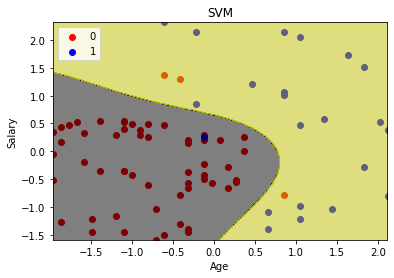

In [77]:
plt.scatter( Xtest[ytest == 0, 0], Xtest[ytest == 0, 1], c = 'r', label=0 )
plt.scatter( Xtest [ytest == 1, 0], Xtest [ytest == 1, 1], c =  'b', label=1 )

plt.contourf(X1,X2,z, alpha=0.5, cmap = ListedColormap(('k', 'y')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

plt.title('SVM')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend(loc='best');